# Quiz 7

## High-frequency trading data Basics

### Question One

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('TAQ_JNJ_1004_1015_2010_trading_.csv',sep='\s+')

In [3]:
data.head()

,date,hour,minute,second,price,volume
0,20101004,6,25,15,61.75,100
1,20101004,8,33,19,61.56,100
2,20101004,8,41,9,61.56,100
3,20101004,8,48,50,61.60,100
4,20101004,8,48,55,61.60,100


In [4]:
data_new = data['hour'].copy()

data_new.head()

0    6
1    8
2    8
3    8
4    8
Name: hour, dtype: int64

In [5]:
for i in range(len(data_new)):
    if data_new[i]<10:
        data_new.loc[i] = str('0'+str(data_new[i]))
data_new.head()

0    06
1    08
2    08
3    08
4    08
Name: hour, dtype: object

In [6]:
data_minute= data['minute'].copy()
for i in range(len(data_minute)):
    if data_minute[i]<10:
        data_minute.loc[i] = str('0'+str(data_minute[i]))
data_minute.head()     

0    25
1    33
2    41
3    48
4    48
Name: minute, dtype: object

In [7]:
data_second= data['second'].copy()
print(data_second.head())

for i in range(len(data_second)):
    if data_second[i]<10:
        data_second.loc[i] = str('0'+str(data_second[i]))
data_second.head()

0    15
1    19
2     9
3    50
4    55
Name: second, dtype: int64


0    15
1    19
2    09
3    50
4    55
Name: second, dtype: object

In [8]:
data1 = data.copy()
data_date = data['date'].copy()
data_time = pd.concat([data_date,data_new,data_minute,data_second],axis=1)
data1.head()

,date,hour,minute,second,price,volume
0,20101004,6,25,15,61.75,100
1,20101004,8,33,19,61.56,100
2,20101004,8,41,9,61.56,100
3,20101004,8,48,50,61.60,100
4,20101004,8,48,55,61.60,100


In [9]:
data_date.head()

0    20101004
1    20101004
2    20101004
3    20101004
4    20101004
Name: date, dtype: int64

In [10]:
data_time.head()

,date,hour,minute,second
0,20101004,06,25,15
1,20101004,08,33,19
2,20101004,08,41,09
3,20101004,08,48,50
4,20101004,08,48,55


In [11]:
time = data_time['date'].copy()
for i in range(len(data_time)):
    time[i] = str(data_time['date'][i])+str(data_time['hour'][i])+str(data_time['minute'][i])+str(data_time['second'][i])
time.head()

0    20101004062515
1    20101004083319
2    20101004084109
3    20101004084850
4    20101004084855
Name: date, dtype: int64

In [12]:
data_time['hour'][1]

'08'

In [13]:
time2 = data_time['hour'].copy()
for i in range(len(data_time)):
    time2[i] = str(data_time['hour'][i])+str(data_time['minute'][i])+str(data_time['second'][i])
time2.head()

0    062515
1    083319
2    084109
3    084850
4    084855
Name: hour, dtype: object

In [14]:
data2 = pd.concat([data1,time,time2], axis=1)
data2.columns = ['date','hour','minute','second','price','volume','time','daytime']

In [15]:
data2.head()


,date,hour,minute,second,price,volume,time,daytime
0,20101004,6,25,15,61.75,100,20101004062515,062515
1,20101004,8,33,19,61.56,100,20101004083319,083319
2,20101004,8,41,9,61.56,100,20101004084109,084109
3,20101004,8,48,50,61.60,100,20101004084850,084850
4,20101004,8,48,55,61.60,100,20101004084855,084855


In [16]:
data2['daytime'] = data2['daytime'].astype(float)
data2 = data2[data2.daytime <= 160000.0]
data2 = data2[data2.daytime >= 093000.0]
data2.index = range(len(data2))
data2['time'] = pd.to_datetime(data2['time'],format = '%Y%m%d%H%M%S')


In [17]:
data2.head()

,date,hour,minute,second,price,volume,time,daytime
0,20101004,9,30,0,61.54,281,2010-10-04 09:30:00,93000.0
1,20101004,9,30,0,61.54,281,2010-10-04 09:30:00,93000.0
2,20101004,9,30,1,61.62,100,2010-10-04 09:30:01,93001.0
3,20101004,9,30,1,61.62,100,2010-10-04 09:30:01,93001.0
4,20101004,9,30,3,61.53,100,2010-10-04 09:30:03,93003.0


In [18]:
data2.tail()

,date,hour,minute,second,price,volume,time,daytime
418860,20101015,16,0,0,63.56,100,2010-10-15 16:00:00,160000.0
418861,20101015,16,0,0,63.57,100,2010-10-15 16:00:00,160000.0
418862,20101015,16,0,0,63.57,100,2010-10-15 16:00:00,160000.0
418863,20101015,16,0,0,63.55,100,2010-10-15 16:00:00,160000.0
418864,20101015,16,0,0,63.55,100,2010-10-15 16:00:00,160000.0


In [19]:
data2.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

### Question Two

In [20]:
first5000 = data2.loc[:5000]
last5000 = data2.iloc[-5000:]
first5000_cleaned = first5000[first5000['volume'] < 2000]
last5000_cleaned = last5000[last5000['volume'] < 2000]


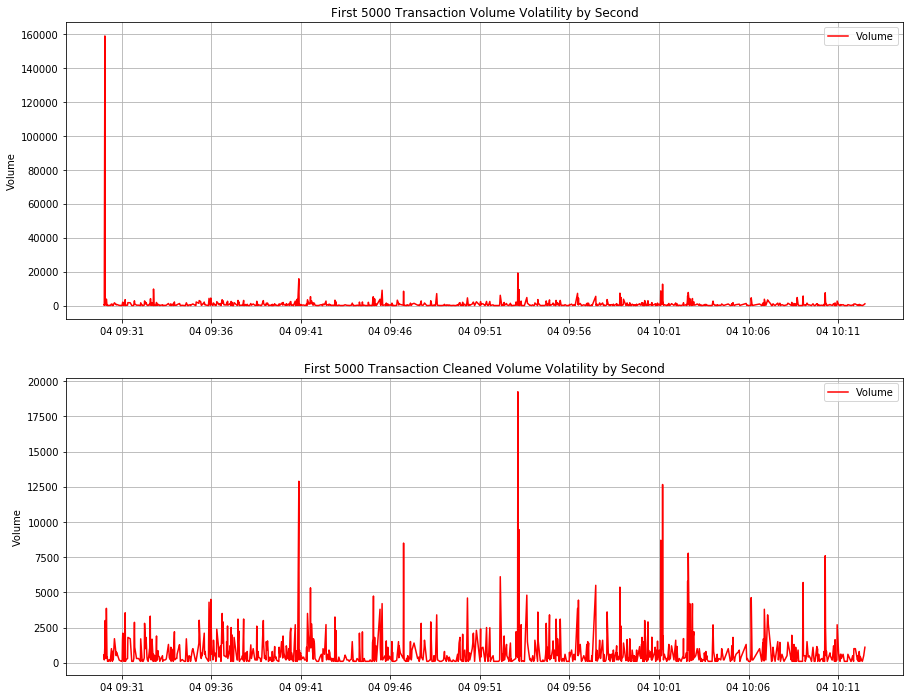

In [21]:
import matplotlib.pylab as pylab
y1 = first5000.groupby('time').sum()['volume']
y2 = first5000_cleaned.groupby('time').sum()['volume']
fig = pylab.figure(figsize = (15,12))
pylab.subplot (2,1,1)

pylab.plot(y1,'r-',label = 'Volume',linewidth = 1.5)
pylab.ylabel('Volume')
pylab.title('First 5000 Transaction Volume Volatility by Second')
pylab.grid(True)
pylab.legend()
pylab.subplot (2,1,2)

pylab.plot(y2,'r-',label = 'Volume',linewidth = 1.5)
pylab.title('First 5000 Transaction Cleaned Volume Volatility by Second')
pylab.ylabel('Volume')
pylab.grid(True)
pylab.legend()
pylab.show()

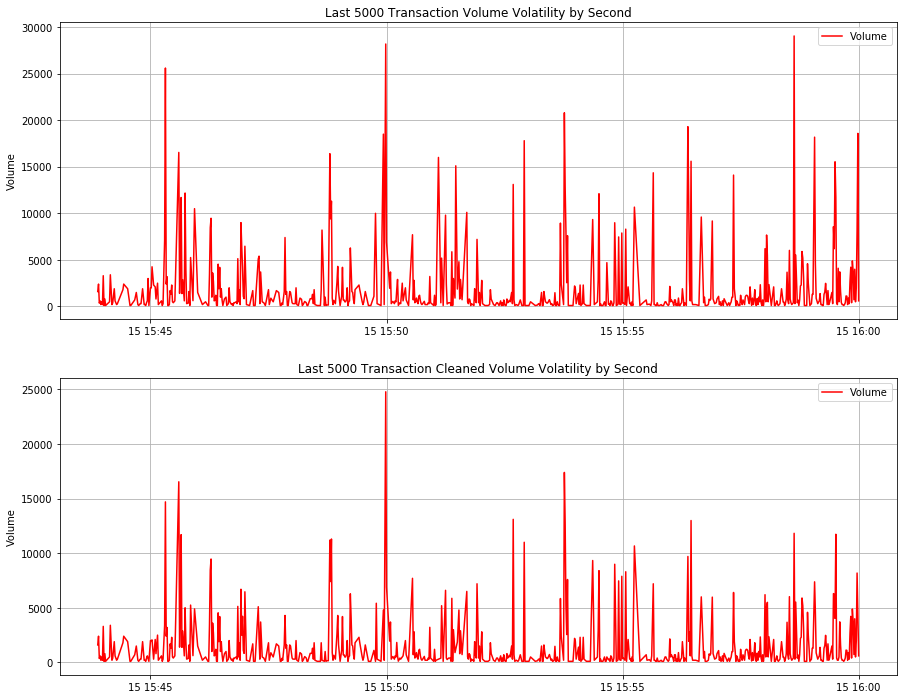

In [22]:
import matplotlib.pylab as pylab
y3 = last5000.groupby('time').sum()['volume']
y4 = last5000_cleaned.groupby('time').sum()['volume']
fig = pylab.figure(figsize = (15,12))
pylab.subplot (2,1,1)

pylab.plot(y3,'r-',label = 'Volume',linewidth = 1.5)
pylab.ylabel('Volume')
pylab.title('Last 5000 Transaction Volume Volatility by Second')
pylab.grid(True)
pylab.legend()
pylab.subplot (2,1,2)

pylab.plot(y4,'r-',label = 'Volume',linewidth = 1.5)
pylab.title('Last 5000 Transaction Cleaned Volume Volatility by Second')
pylab.ylabel('Volume')
pylab.grid(True)
pylab.legend()
pylab.show()



### Obviously, last 5000 transactions volume volatility higher than first 5000 transaction volume volatility.

### Question 3

### Count the number of transitions with price change

In [23]:
S_i =data2['price']
S_i_minus_1 = data2['price'].shift(1)
U_sequence = list(np.log(S_i/S_i_minus_1))
len(U_sequence)-U_sequence.count(0)

114798

In [24]:
print("%d times price change" % (len(U_sequence) - U_sequence.count(0)))

114798 times price change


### Visualize the price change

In [25]:
changed_price = list(filter(lambda x: x[1]!=0, list(enumerate(U_sequence))))

<Figure size 1152x360 with 0 Axes>

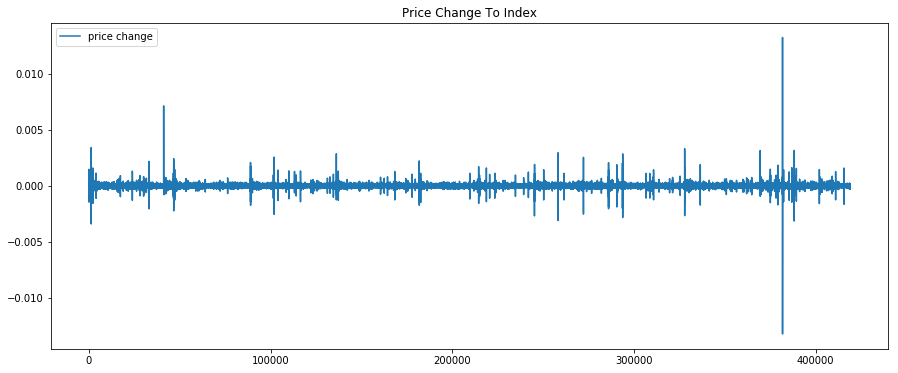

In [26]:
x = list(map(lambda x:x[0],changed_price))
y = list(map(lambda x:x[1],changed_price))
plt.figure(figsize=(16,5))
pd.DataFrame(data = y, index = x,columns = ['price change']).plot(figsize=(15,6),title = 'Price Change To Index')
plt.show()

### Draw a histogram of the frequency of all transactions with a price change

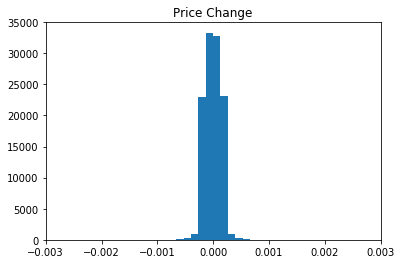

In [27]:
y5 = y[1:]
plt.hist(y5,bins = 200)
plt.xlim(-0.003,0.003)
plt.title('Price Change')
plt.show()

### Question 4

In [28]:
##data2 = pd.read_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

In [29]:
intervals = ['5Min','10Min','30Min','60Min']

In [30]:
##data2 = data2.set_index('time')

In [31]:
##data2.head()

In [32]:
for i in intervals:
    grouped = data2.groupby(pd.TimeGrouper(key = 'time',freq=i)).aggregate(np.sum)
    S_i = grouped['price']
    S_i_minus_1 = grouped['price'].shift(1)
    grouped['log_return'] = np.log(S_i/S_i_minus_1)
    grouped.to_csv('TAQ_JNJ_1004_1015_2010_'+i+'trading_unit.csv')

### Question 5&6&7

In [33]:
for i in intervals:
    grouped = data2.groupby(pd.TimeGrouper(key = 'time',freq=i)).aggregate(np.mean)
    S_i = grouped['price']
    S_i_minus_1 = grouped['price'].shift(1)
    grouped['log_return'] = np.log(S_i/S_i_minus_1)
    n = len(grouped)
    part1 = (1/(n-1))*np.sum(np.log(S_i/S_i_minus_1)*np.log(S_i/S_i_minus_1))
    part2 = 1/((n-1)*n)*np.sum(np.log(S_i/S_i_minus_1))*np.sum(np.log(S_i/S_i_minus_1))
    section_vol = np.sqrt(part1-part2)
    vol = grouped['price']
    part1 = (1/(n-1))*np.sum(vol*vol)
    part2 = 1/((n-1)*n)*(np.sum(vol)**2)
    realized_vol = np.sqrt(part1-part2)
    u_mean = np.mean(np.log(S_i/S_i_minus_1))
    skewness_0 = np.sum((np.log(S_i/S_i_minus_1)-u_mean)**3)
    skewness = n*skewness_0/((n-1)*(n-2)*section_vol**3)
    kurtosis_0 = np.sum((np.log(S_i/S_i_minus_1)-u_mean)**4)
    kurtosis = (kurtosis_0/(n*section_vol**4))-3
    print('For',i,'Trading period: \nSection Volatility is'+ str(section_vol))
    print('Realized Volatility is',str(realized_vol))
    print('Skewness is',str(skewness))
    print('Kurtosis is',str(kurtosis),'\n')

For 5Min Trading period: 
Section Volatility is0.0002960214353059692
Realized Volatility is 27.058884954276103
Skewness is -0.12467380747585526
Kurtosis is 18.573045981497405 

For 10Min Trading period: 
Section Volatility is0.000427272256014631
Realized Volatility is 27.17603682226003
Skewness is 0.5422088225217688
Kurtosis is 15.47029346967194 

For 30Min Trading period: 
Section Volatility is0.0006793502964996417
Realized Volatility is 27.626821139425836
Skewness is -1.1930782495937735
Kurtosis is 18.647119825514853 

For 60Min Trading period: 
Section Volatility is0.0009005001114707663
Realized Volatility is 28.788549422037924
Skewness is -1.118078907782702
Kurtosis is 14.296084051541392 



## Repeat 1-7 for TAQ_CAT_Feb_2010_trading_.csv, which includes all transactions for caterpillar (CAT) stock in Feb 2010

### Question 1

In [34]:
dt = pd.read_csv('TAQ_CAT_Feb_2010_trading_.csv',sep='\s+')
dt.head()

,DATE,Hour,Min,Sec,PRICE,SIZE
0,20100201,8,11,42,52.52,100
1,20100201,8,11,42,52.52,200
2,20100201,8,11,43,52.50,200
3,20100201,8,38,50,52.24,3149
4,20100201,8,39,3,52.65,100


In [35]:
dt_new = dt['Hour'].copy()
dt_new.head()

0    8
1    8
2    8
3    8
4    8
Name: Hour, dtype: int64

In [36]:
for i in range(len(dt_new)):
    if dt_new[i]<10:
        dt_new.loc[i] = str('0'+str(dt_new[i]))
dt_new.head()

0    08
1    08
2    08
3    08
4    08
Name: Hour, dtype: object

In [37]:
dt_minute= dt['Min'].copy()
for i in range(len(dt_minute)):
    if dt_minute[i]<10:
        dt_minute.loc[i] = str('0'+str(dt_minute[i]))
dt_minute.head()     

0    11
1    11
2    11
3    38
4    39
Name: Min, dtype: object

In [38]:
dt_second= dt['Sec'].copy()
dt_second.head()     

for i in range(len(dt_second)):
    if dt_second[i]<10:
        dt_second.loc[i] = str('0'+str(dt_second[i]))
dt_second.head()

0    42
1    42
2    43
3    50
4    03
Name: Sec, dtype: object

In [39]:
dt1 = dt.copy()
dt_date = dt['DATE'].copy()
dt_time = pd.concat([dt_date,dt_new,dt_minute,dt_second],axis=1)
dt_time.head()

,DATE,Hour,Min,Sec
0,20100201,08,11,42
1,20100201,08,11,42
2,20100201,08,11,43
3,20100201,08,38,50
4,20100201,08,39,03


In [40]:
time3 = dt_time['DATE'].copy()
for i in range(len(dt_time)):
    time3[i] = str(dt_time['DATE'][i])+str(dt_time['Hour'][i])+str(dt_time['Min'][i])+str(dt_time['Sec'][i])
time3.head()

0    20100201081142
1    20100201081142
2    20100201081143
3    20100201083850
4    20100201083903
Name: DATE, dtype: int64

In [41]:
time4 = dt_time['Hour'].copy()
for i in range(len(dt_time)):
    time4[i] = str(dt_time['Hour'][i])+str(dt_time['Min'][i])+str(dt_time['Sec'][i])
dt2 = pd.concat([dt1,time3,time4], axis=1)
dt2.head()

,DATE,Hour,Min,Sec,PRICE,SIZE,DATE,Hour
0,20100201,8,11,42,52.52,100,20100201081142,081142
1,20100201,8,11,42,52.52,200,20100201081142,081142
2,20100201,8,11,43,52.50,200,20100201081143,081143
3,20100201,8,38,50,52.24,3149,20100201083850,083850
4,20100201,8,39,3,52.65,100,20100201083903,083903


In [42]:
dt2.columns = ['DATE','Hour','Min','Sec','PRICE','SIZE','time','daytime']
dt2.head()

,DATE,Hour,Min,Sec,PRICE,SIZE,time,daytime
0,20100201,8,11,42,52.52,100,20100201081142,081142
1,20100201,8,11,42,52.52,200,20100201081142,081142
2,20100201,8,11,43,52.50,200,20100201081143,081143
3,20100201,8,38,50,52.24,3149,20100201083850,083850
4,20100201,8,39,3,52.65,100,20100201083903,083903


In [43]:
dt2['daytime'] = dt2['daytime'].astype(float)
dt2 = dt2[dt2.daytime <= 160000.0]
dt2 = dt2[dt2.daytime >= 093000.0]
dt2.index = range(len(dt2))
dt2.head()

,DATE,Hour,Min,Sec,PRICE,SIZE,time,daytime
0,20100201,9,30,0,52.82,4528,20100201093000,93000.0
1,20100201,9,30,0,52.82,4528,20100201093000,93000.0
2,20100201,9,30,4,52.85,5,20100201093004,93004.0
3,20100201,9,30,8,52.83,83300,20100201093008,93008.0
4,20100201,9,30,8,52.86,200,20100201093008,93008.0


In [44]:
dt2['time'] = pd.to_datetime(dt2['time'],format = '%Y%m%d%H%M%S')

In [45]:
dt2.to_csv('TAQ_CAT_Feb_2010_trading_normal_hours.csv')

### Question 2

In [46]:
first5000 = dt2.loc[:5000]
last5000 = dt2.iloc[-5000:]
first5000_cleaned = first5000[first5000['SIZE'] < 2000]
last5000_cleaned = last5000[last5000['SIZE'] < 2000]

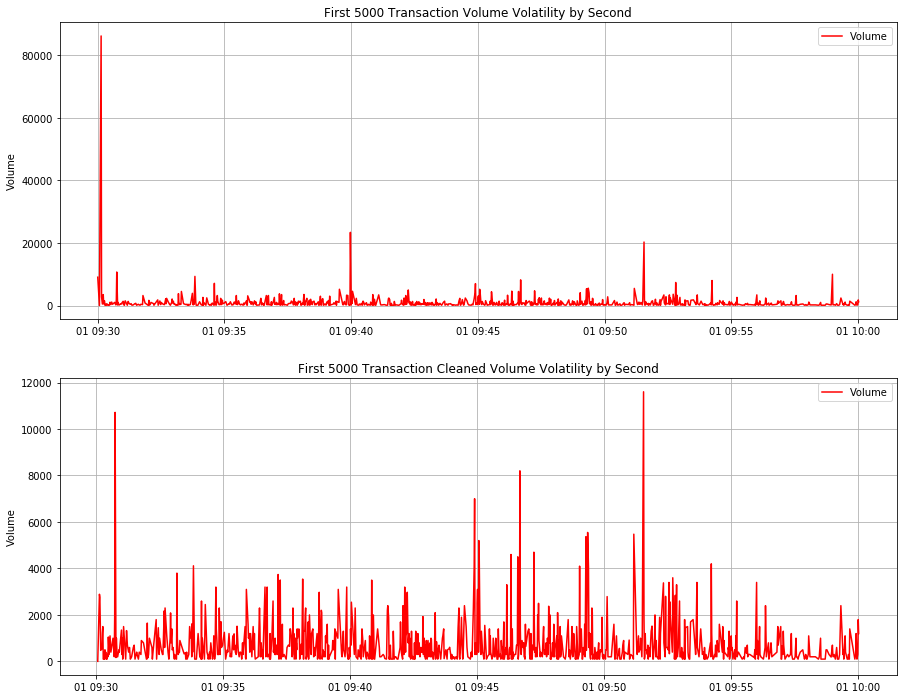

In [47]:
import matplotlib.pylab as pylab
y1 = first5000.groupby('time').sum()['SIZE']
y2 = first5000_cleaned.groupby('time').sum()['SIZE']
fig = pylab.figure(figsize = (15,12))
pylab.subplot (2,1,1)

pylab.plot(y1,'r-',label = 'Volume',linewidth = 1.5)
pylab.ylabel('Volume')
pylab.title('First 5000 Transaction Volume Volatility by Second')
pylab.grid(True)
pylab.legend()
pylab.subplot (2,1,2)

pylab.plot(y2,'r-',label = 'Volume',linewidth = 1.5)
pylab.title('First 5000 Transaction Cleaned Volume Volatility by Second')
pylab.ylabel('Volume')
pylab.grid(True)
pylab.legend()
pylab.show()

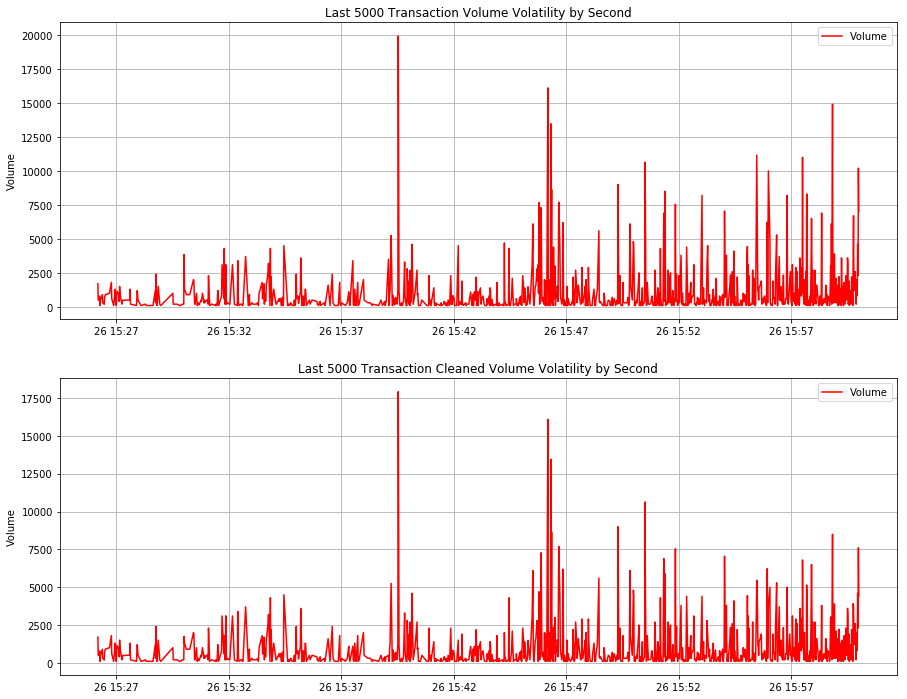

In [48]:
import matplotlib.pylab as pylab
y3 = last5000.groupby('time').sum()['SIZE']
y4 = last5000_cleaned.groupby('time').sum()['SIZE']
fig = pylab.figure(figsize = (15,12))
pylab.subplot (2,1,1)

pylab.plot(y3,'r-',label = 'Volume',linewidth = 1.5)
pylab.ylabel('Volume')
pylab.title('Last 5000 Transaction Volume Volatility by Second')
pylab.grid(True)
pylab.legend()
pylab.subplot (2,1,2)

pylab.plot(y4,'r-',label = 'Volume',linewidth = 1.5)
pylab.title('Last 5000 Transaction Cleaned Volume Volatility by Second')
pylab.ylabel('Volume')
pylab.grid(True)
pylab.legend()
pylab.show()


### Question 3

### Count the number of transitions with price change

In [49]:
S_i =dt2['PRICE']
S_i_minus_1 = dt2['PRICE'].shift(1)
U_sequence = list(np.log(S_i/S_i_minus_1))
len(U_sequence)-U_sequence.count(0)


318016

In [50]:
print("%d times price change" % (len(U_sequence) - U_sequence.count(0)))

318016 times price change


### Visualize the price change

In [51]:
changed_price = list(filter(lambda x: x[1]!=0, list(enumerate(U_sequence))))

<Figure size 1152x360 with 0 Axes>

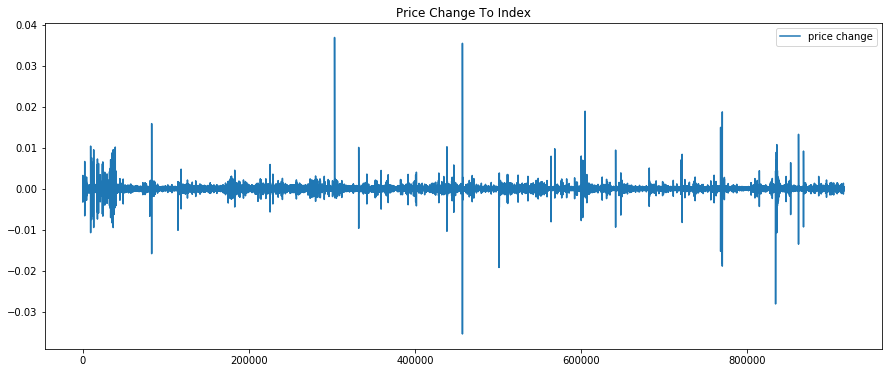

In [52]:
x = list(map(lambda x:x[0],changed_price))
y = list(map(lambda x:x[1],changed_price))
plt.figure(figsize=(16,5))
pd.DataFrame(data = y, index = x,columns = ['price change']).plot(figsize=(15,6),title = 'Price Change To Index')
plt.show()

### Draw a histogram of the frequency of all transactions with a price change

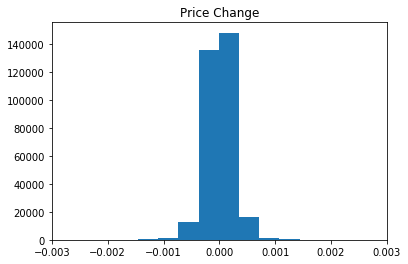

In [53]:
y6 = y[1:]
plt.hist(y6,bins = 200)
plt.xlim(-0.003,0.003)
plt.title('Price Change')
plt.show()

### Question 4

In [54]:
intervals = ['5Min','10Min','30Min','60Min']

In [55]:
for i in intervals:
    grouped = dt2.groupby(pd.TimeGrouper(key = 'time',freq=i)).aggregate(np.sum)
    S_i = grouped['PRICE']
    S_i_minus_1 = grouped['PRICE'].shift(1)
    grouped['log_return'] = np.log(S_i/S_i_minus_1)
    grouped.to_csv('TAQ_CAT_Feb_2010_trading_'+i+'trading_period.csv')

### Question 5&6&7

In [56]:
for i in intervals:
    grouped = dt2.groupby(pd.TimeGrouper(key = 'time',freq=i)).aggregate(np.mean)
    S_i = grouped['PRICE']
    S_i_minus_1 = grouped['PRICE'].shift(1)
    grouped['log_return'] = np.log(S_i/S_i_minus_1)
    n = len(grouped)
    part1 = (1/(n-1))*np.sum(np.log(S_i/S_i_minus_1)*np.log(S_i/S_i_minus_1))
    part2 = 1/((n-1)*n)*np.sum(np.log(S_i/S_i_minus_1))*np.sum(np.log(S_i/S_i_minus_1))
    section_vol = np.sqrt(part1-part2)
    vol = grouped['PRICE']
    part1 = (1/(n-1))*np.sum(vol*vol)
    part2 = 1/((n-1)*n)*(np.sum(vol)**2)
    realized_volatility = np.sqrt(part1-part2)
    u_mean = np.mean(np.log(S_i/S_i_minus_1))
    skewness_0 = np.sum((np.log(S_i/S_i_minus_1)-u_mean)**3)
    skewness = n*skewness_0/((n-1)*(n-2)*section_vol**3)
    kurtosis_0 = np.sum((np.log(S_i/S_i_minus_1)-u_mean)**4)
    kurtosis = (kurtosis_0/(n*section_vol**4))-3
    print('For',i,'Trading period: \nSection Volatility is'+ str(section_vol))
    print('Realized Volatility is',str(realized_volatility))
    print('Skewness is',str(skewness))
    print('Kurtosis is',str(kurtosis),'\n')

For 5Min Trading period: 
Section Volatility is0.0007470411744851932
Realized Volatility is 22.331033446742566
Skewness is -0.4880191246578328
Kurtosis is 22.98979065459616 

For 10Min Trading period: 
Section Volatility is0.0009868267724777481
Realized Volatility is 22.435696269955177
Skewness is 0.06014695207883852
Kurtosis is 19.449470781237995 

For 30Min Trading period: 
Section Volatility is0.0016661973937010309
Realized Volatility is 22.841279653680736
Skewness is 0.07642516296806204
Kurtosis is 18.513051989660912 

For 60Min Trading period: 
Section Volatility is0.002362937406366668
Realized Volatility is 23.918098103879387
Skewness is 0.4761371528875239
Kurtosis is 16.66756532256072 

